In [1]:
from sklearn import tree
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=read_csv("Travel.csv")

In [2]:
df

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


<function matplotlib.pyplot.show(close=None, block=None)>

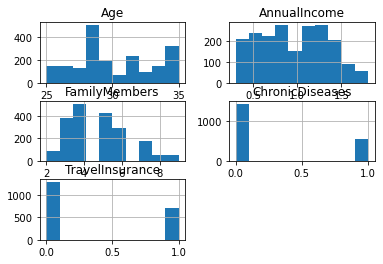

In [3]:
df.hist()
plt.show

In [4]:
features=['Age', 'AnnualIncome', 'FamilyMembers','ChronicDiseases']
X=df[features]
y=df['TravelInsurance']
print(X)
print(y)
    

      Age  AnnualIncome  FamilyMembers  ChronicDiseases
0      31        400000              6                1
1      31       1250000              7                0
2      34        500000              4                1
3      28        700000              3                1
4      28        700000              8                1
...   ...           ...            ...              ...
1982   33       1500000              4                0
1983   28       1750000              5                1
1984   28       1150000              6                1
1985   34       1000000              6                0
1986   34        500000              4                0

[1987 rows x 4 columns]
0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64


In [5]:
!pip install pydotplus

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   EmploymentType       1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


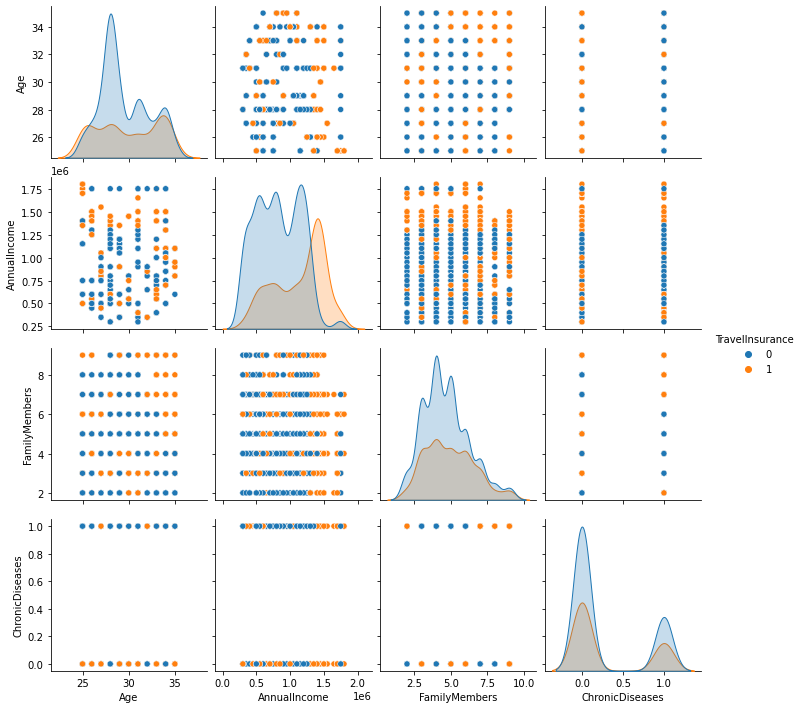

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv('Travel.csv')
raw_data.columns
raw_data.info()
sns.pairplot(raw_data, hue = 'TravelInsurance')

In [8]:
inputs=df.drop('TravelInsurance',axis='columns')
target=df['TravelInsurance']

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le_EmploymentType=LabelEncoder()
le_GraduateOrNot=LabelEncoder()
le_FrequentFlyer=LabelEncoder()
le_EverTravelledAbroad=LabelEncoder()

In [11]:
inputs['EmploymentType_n']=le_EmploymentType.fit_transform(inputs['EmploymentType'])
inputs['GraduateOrNot_n']=le_GraduateOrNot.fit_transform(inputs['GraduateOrNot'])
inputs['FrequentFlyer_n']=le_FrequentFlyer.fit_transform(inputs['FrequentFlyer'])
inputs['EverTravelledAbroad_n']=le_EverTravelledAbroad.fit_transform(inputs['EverTravelledAbroad'])
inputs.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,EmploymentType_n,GraduateOrNot_n,FrequentFlyer_n,EverTravelledAbroad_n
0,31,Government Sector,Yes,400000,6,1,No,No,0,1,0,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,1,1,0,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,1,0,0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,1,1,0,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,1,1,1,0


In [12]:
inputs_n=inputs.drop(['EmploymentType','GraduateOrNot','FrequentFlyer','EverTravelledAbroad'],axis='columns')
inputs_n

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,EmploymentType_n,GraduateOrNot_n,FrequentFlyer_n,EverTravelledAbroad_n
0,31,400000,6,1,0,1,0,0
1,31,1250000,7,0,1,1,0,0
2,34,500000,4,1,1,1,0,0
3,28,700000,3,1,1,1,0,0
4,28,700000,8,1,1,1,1,0
...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,1
1983,28,1750000,5,1,1,1,0,1
1984,28,1150000,6,1,1,1,0,0
1985,34,1000000,6,0,1,1,1,1


In [13]:
from sklearn import tree

In [14]:
model=tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [15]:
model.score(inputs_n,target)

0.9149471565173629

In [16]:
model.predict([[1,1,0,1,0,1,0,0]])

array([0], dtype=int64)

In [17]:
model.predict([[1,1,0,1,1,1,1,1]])

array([1], dtype=int64)

In [18]:
X

,Age,AnnualIncome,FamilyMembers,ChronicDiseases
0,31,400000,6,1
1,31,1250000,7,0
2,34,500000,4,1
3,28,700000,3,1
4,28,700000,8,1
...,...,...,...,...
1982,33,1500000,4,0
1983,28,1750000,5,1
1984,28,1150000,6,1
1985,34,1000000,6,0


In [19]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64

In [20]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [21]:
X.shape

(1987, 4)

In [22]:
X_train.shape

(1390, 4)

In [23]:
X_test.shape

(597, 4)

In [24]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [25]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7855946398659966


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       383
           1       0.77      0.57      0.66       214

    accuracy                           0.79       597
   macro avg       0.78      0.74      0.75       597
weighted avg       0.78      0.79      0.78       597

